In [34]:
# import libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# import csv

cases = pd.read_csv("casos_fecha - Hoja 1.csv")

In [4]:
cases.head()

,fecha,casos
0,1/1/20,1
1,2/1/20,0
2,3/1/20,1
3,4/1/20,0
4,5/1/20,0


In [20]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fecha   541 non-null    object
 1   casos   541 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.6+ KB


In [7]:
keywords = pd.read_csv("covid_keywords - Hoja 1.csv")

In [8]:
keywords.head()

,Date,tos,dolor de garganta,fiebre,cansancio,dolor de cabeza
0,1/1/20,18,3,16,3,9
1,2/1/20,14,4,14,2,8
2,3/1/20,21,8,16,4,4
3,4/1/20,18,4,14,2,7
4,5/1/20,12,4,13,1,9


In [23]:
keywords.rename(columns={"Date": "fecha"})

,fecha,tos,dolor de garganta,fiebre,cansancio,dolor de cabeza
0,1/1/20,18,3,16,3,9
1,2/1/20,14,4,14,2,8
2,3/1/20,21,8,16,4,4
3,4/1/20,18,4,14,2,7
4,5/1/20,12,4,13,1,9
...,...,...,...,...,...,...
537,21/6/21,23,3,45,20,25
538,22/6/21,22,5,43,30,14
539,23/6/21,27,8,49,11,23
540,24/6/21,26,12,48,14,30


In [24]:
keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               542 non-null    object
 1   tos                542 non-null    int64 
 2   dolor de garganta  542 non-null    int64 
 3   fiebre             542 non-null    int64 
 4   cansancio          542 non-null    int64 
 5   dolor de cabeza    542 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 25.5+ KB


In [31]:
cases_key = pd.merge(cases, keywords, left_on=["fecha"],right_on=["Date"]) 
cases_key

,fecha,casos,Date,tos,dolor de garganta,fiebre,cansancio,dolor de cabeza
0,1/1/20,1,1/1/20,18,3,16,3,9
1,2/1/20,0,2/1/20,14,4,14,2,8
2,3/1/20,1,3/1/20,21,8,16,4,4
3,4/1/20,0,4/1/20,18,4,14,2,7
4,5/1/20,0,5/1/20,12,4,13,1,9
...,...,...,...,...,...,...,...,...
536,20/6/21,2016,20/6/21,33,11,57,15,35
537,21/6/21,2404,21/6/21,23,3,45,20,25
538,22/6/21,2237,22/6/21,22,5,43,30,14
539,23/6/21,1193,23/6/21,27,8,49,11,23


In [32]:
cases_key.drop(["Date"], axis = 1, inplace = True) 

In [33]:
cases_key

,fecha,casos,tos,dolor de garganta,fiebre,cansancio,dolor de cabeza
0,1/1/20,1,18,3,16,3,9
1,2/1/20,0,14,4,14,2,8
2,3/1/20,1,21,8,16,4,4
3,4/1/20,0,18,4,14,2,7
4,5/1/20,0,12,4,13,1,9
...,...,...,...,...,...,...,...
536,20/6/21,2016,33,11,57,15,35
537,21/6/21,2404,23,3,45,20,25
538,22/6/21,2237,22,5,43,30,14
539,23/6/21,1193,27,8,49,11,23


In [49]:
cases_key.to_csv(r'/Users/walterconde/Ironhack/Repositories/IronWalter/Projects/Midterm\Cases_Keywords.csv')

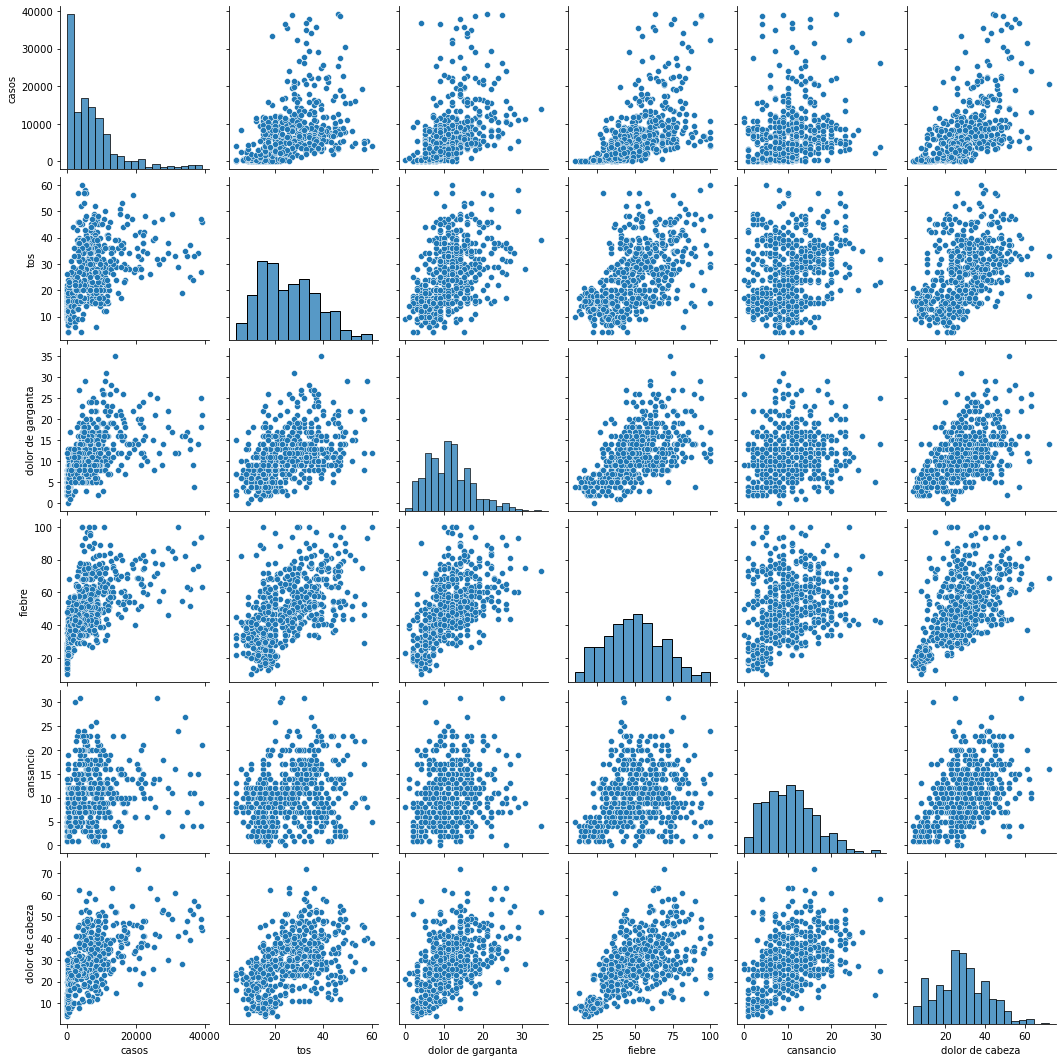

In [35]:
sns.pairplot(cases_key)

In [39]:
correlations_matrix = cases_key.corr()
correlations_matrix

,casos,tos,dolor de garganta,fiebre,cansancio,dolor de cabeza
casos,1.000000,0.460442,0.498137,0.584239,0.253051,0.601388
tos,0.460442,1.000000,0.485570,0.546790,0.248288,0.493040
dolor de garganta,0.498137,0.485570,1.000000,0.586254,0.274041,0.537543
fiebre,0.584239,0.546790,0.586254,1.000000,0.282057,0.569703
cansancio,0.253051,0.248288,0.274041,0.282057,1.000000,0.514318
dolor de cabeza,0.601388,0.493040,0.537543,0.569703,0.514318,1.000000


<AxesSubplot:>

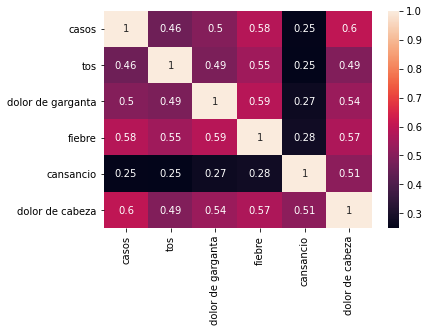

In [40]:
sns.heatmap(correlations_matrix, annot=True)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

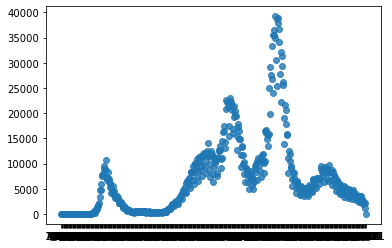

In [42]:
sns.regplot(y="casos", x="fecha", data = cases_key)